# 10.
전통적인 올리베티 얼굴 데이터셋은 64X64 픽셀 크기의 흑백 얼굴 이미지 400개를 담고 있습니다. 각 이미지는 4096 크기의 1D 벡터로 펼쳐져 있습니다. 사람 30명의 사진을 10장씩 찍은 것입니다. 어떤 사람의 사진인지 예측하는 모델을 훈련하는 것이 일반적입니다. sklearn, datasets, fetch_olivetti_faces() 함수를 사용해 데이터셋을 불러오고 훈련 세트, 검정 세트, 테스트 세트로 나눕니다.(이 데이터셋은 이미 0에서 1사이로 스케일이 조정되어 있습니다.) 이 데이터셋은 매우 작으니 계층적 샘플링을 사용해 각 세트에 동일한 사람의 얼굴이 고루 섞이도록 하는 것이 좋습니다. 그 다음 k-평균을 사용해 이미지를 군집보세요. (이 장에서 소개한 기법 중 하나를 사용해) 적절할 클러스터 개수를 찾아보세요. 클러스터를 시각화해보세요. 각 클러스터에 비슷한 얼굴이 들어 있나요?

In [1]:
# 사이킷런의 데이터중 올리베티 얼굴 데이터셋을 가져오기
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [2]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [3]:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [5]:
# 테이터셋을 훈련 세트, 검증 세트, 테스트 세트로 나눔
# 사이킷런의 StratifiedShuffleSplit 함수를 이요해서 train, test set분할(층을 고려)
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data, olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [6]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


**PCA**
: 데이터 하나 하나에 대한 성분을 분석하는 것이 아니라 여러 데이터들이 모여 하나의 분포를 이룰 때 이 분포의 주성분을 분석해 주는 방법이다. 여기서 주성분은 그 방향으로 데이터들의 분산이 가장 큰 방향벡터를 의미한다.

속도를 높이기 위해 PCA로 데이터의 차원을 줄임

In [7]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

# 선택한 차원(픽셀)의 수
pca.n_components_

199

199개로 축소

In [8]:
# k-means을 이용해 클러스터 개수 구하기
from sklearn.cluster import KMeans

k_range = range(5, 150, 5)
kmeans_per_k = []
for k in k_range:
    print("k={}".format(k))
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train_pca)
    kmeans_per_k.append(kmeans)

k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145


In [12]:
import numpy as np
import matplotlib.pyplot as plt

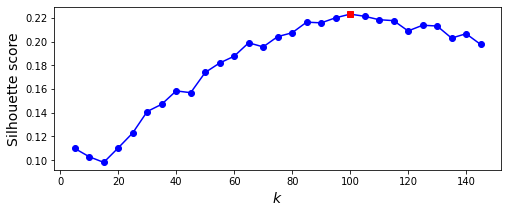

In [13]:
# 최적의 클러스터 찾기
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

In [14]:
best_k

100

최적의 클러스터 개수는 100

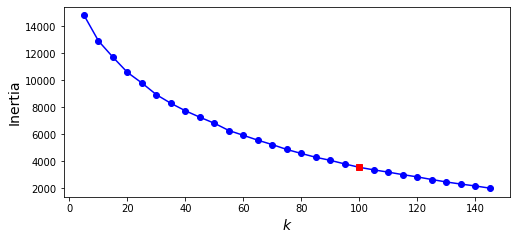

In [15]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.plot(best_k, best_inertia, "rs")
plt.show()

In [16]:
best_model = kmeans_per_k[best_index]

Cluster 0


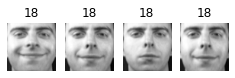

Cluster 1


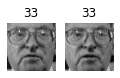

Cluster 2


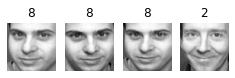

Cluster 3


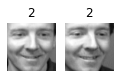

Cluster 4


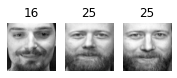

Cluster 5


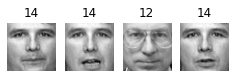

Cluster 6


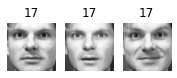

Cluster 7


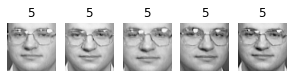

Cluster 8


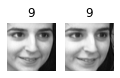

Cluster 9


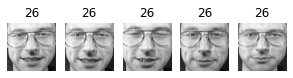

Cluster 10


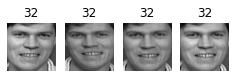

Cluster 11


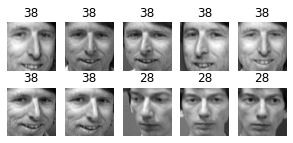

Cluster 12


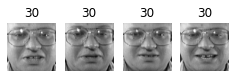

Cluster 13


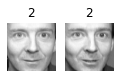

Cluster 14


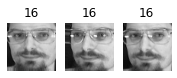

Cluster 15


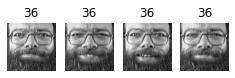

Cluster 16


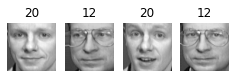

Cluster 17


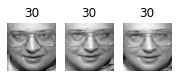

Cluster 18


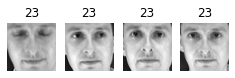

Cluster 19


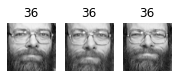

Cluster 20


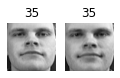

Cluster 21


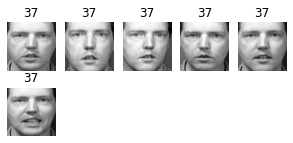

Cluster 22


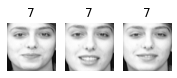

Cluster 23


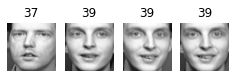

Cluster 24


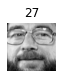

Cluster 25


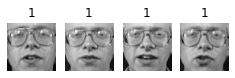

Cluster 26


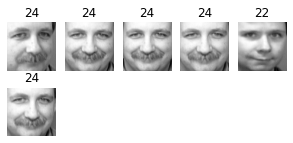

Cluster 27


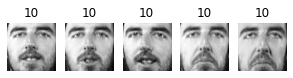

Cluster 28


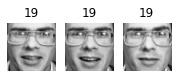

Cluster 29


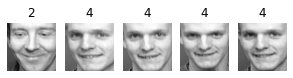

Cluster 30


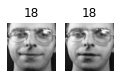

Cluster 31


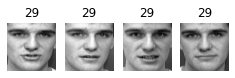

Cluster 32


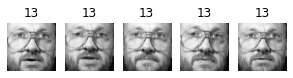

Cluster 33


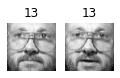

Cluster 34


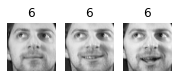

Cluster 35


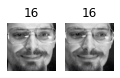

Cluster 36


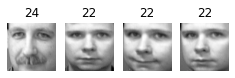

Cluster 37


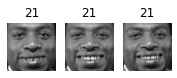

Cluster 38


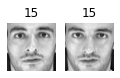

Cluster 39


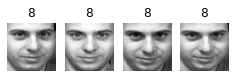

Cluster 40


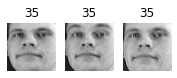

Cluster 41


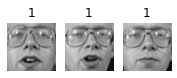

Cluster 42


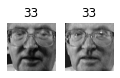

Cluster 43


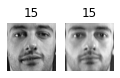

Cluster 44


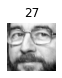

Cluster 45


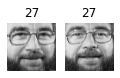

Cluster 46


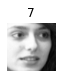

Cluster 47


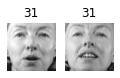

Cluster 48


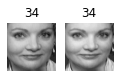

Cluster 49


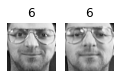

Cluster 50


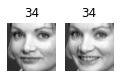

Cluster 51


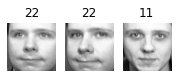

Cluster 52


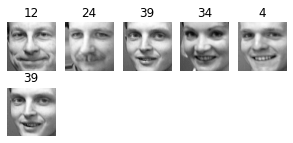

Cluster 53


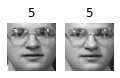

Cluster 54


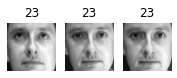

Cluster 55


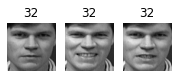

Cluster 56


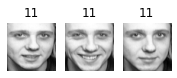

Cluster 57


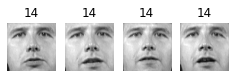

Cluster 58


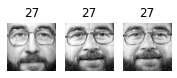

Cluster 59


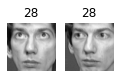

Cluster 60


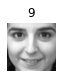

Cluster 61


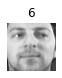

Cluster 62


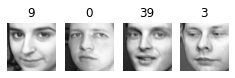

Cluster 63


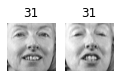

Cluster 64


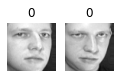

Cluster 65


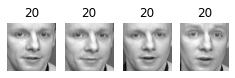

Cluster 66


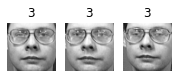

Cluster 67


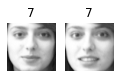

Cluster 68


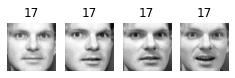

Cluster 69


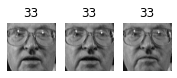

Cluster 70


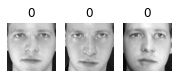

Cluster 71


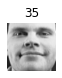

Cluster 72


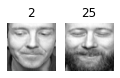

Cluster 73


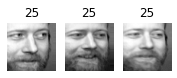

Cluster 74


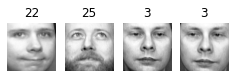

Cluster 75


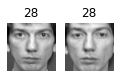

Cluster 76


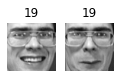

Cluster 77


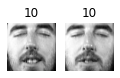

Cluster 78


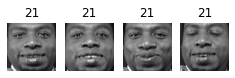

Cluster 79


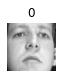

Cluster 80


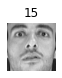

Cluster 81


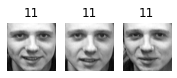

Cluster 82


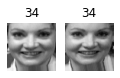

Cluster 83


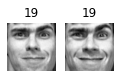

Cluster 84


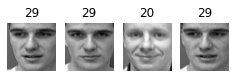

Cluster 85


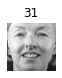

Cluster 86


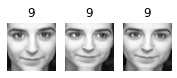

Cluster 87


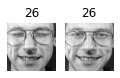

Cluster 88


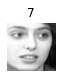

Cluster 89


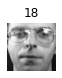

Cluster 90


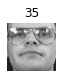

Cluster 91


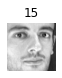

Cluster 92


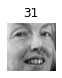

Cluster 93


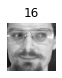

Cluster 94


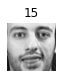

Cluster 95


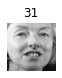

Cluster 96


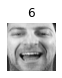

Cluster 97


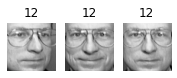

Cluster 98


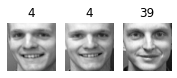

Cluster 99


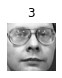

In [17]:
# 클러스터에 따라 시각화
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

# 11.
올리베티 얼굴 데이터셋으로 계속해보겠습니다. 사진에 나타난 사람을 예측하는 분류기를 훈련하고 검증 세트에서 평가해보세요. 그 다음 k-평균을 차원 축소 도구로 사용하여 축소된 세트에서 분류기를 훈련해보세요. 분류기 성능을 최대로 만드는 클러스터 개수를 찾아보세요. 얼마나 성능이 나오나요? 축소된 세트에서 추출한 특성을 원본 특성에 추가하면 어떤가요?(여기에서도 최선의 클러스터 개수를 찾아보세요.)

**랜덤 포레스트**
: 분류, 회귀 등에 사용되는 앙상블 학습 방법의 일종으로 훈련 과정에서 구성한 다수의 결정 트리로부터 분류 또는 평균 예측치(회귀 분석)를 출력함으로써 동작한다.

In [18]:
# 랜덤 포레스트 분류기
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_pca, y_train)
clf.score(X_valid_pca, y_valid)

0.925

In [19]:
# k-means을 차원 축소 도구로 사용하여 축소된 세트에서 분류기 훈련
X_train_reduced = best_model.transform(X_train_pca)
X_valid_reduced = best_model.transform(X_valid_pca)
X_test_reduced = best_model.transform(X_test_pca)

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_reduced, y_train)
    
clf.score(X_valid_reduced, y_valid)

0.75

In [20]:
# 클러스터 개수를 튜닝
from sklearn.pipeline import Pipeline

for n_clusters in k_range:
    pipeline = Pipeline([
        ("kmeans", KMeans(n_clusters=n_clusters, random_state=42)),
        ("forest_clf", RandomForestClassifier(n_estimators=150, random_state=42))
    ])
    pipeline.fit(X_train_pca, y_train)
    print(n_clusters, pipeline.score(X_valid_pca, y_valid))

5 0.4125
10 0.525
15 0.5375
20 0.6375
25 0.65
30 0.6375
35 0.675
40 0.7375
45 0.725
50 0.75
55 0.7375
60 0.725
65 0.7375
70 0.725
75 0.725
80 0.7375
85 0.7375
90 0.7375
95 0.75
100 0.75
105 0.75
110 0.7375
115 0.7375
120 0.75
125 0.75
130 0.725
135 0.75
140 0.7625
145 0.7375


정확도가 아직 80%를 넘지 못한다.

In [21]:
# 축소된 세트에서 추출한 특성을 원본 특성에 추가
X_train_extended = np.c_[X_train_pca, X_train_reduced]
X_valid_extended = np.c_[X_valid_pca, X_valid_reduced]
X_test_extended = np.c_[X_test_pca, X_test_reduced]

In [22]:
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_extended, y_train)
clf.score(X_valid_extended, y_valid)

0.825

추가 후에 82.5%로 좋아졌다.

# 12.
올리베티 얼굴 뎅터셋에서 가우시안 혼합 모델을 훈련해보세요. 알고리즘의 속도를 높이기 위해 데이터셋의 차원을 감소시켜야 할 것입니다.(예를 들면 분산의 99%를 유지하면서 PCA를 사용합니다.) 이 모델을 사용해 (sample() 메서드로) 새로운 얼굴을 생성합니다.) 일부 이미지를 수정해보세요. (예를 들어 회전, 뒤집기, 어둡게 하기) 모델이 이상치를 감지하는지 확인해보세요.(즉 정상 샘플과 이상치에 대해 score_samples() 메서드 출력을 비교해보세요.)

In [23]:
# 가우시안 혼합 모델 훈련
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=40, random_state=42)
y_pred = gm.fit_predict(X_train_pca)

In [24]:
# 새로운 얼굴 생성
n_gen_faces = 20
gen_faces_reduced, y_gen_faces = gm.sample(n_samples=n_gen_faces)
gen_faces = pca.inverse_transform(gen_faces_reduced)

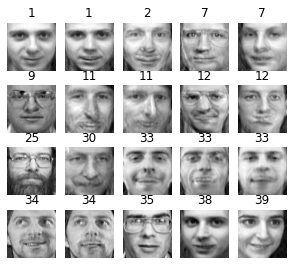

In [25]:
# 시각화
plot_faces(gen_faces, y_gen_faces)

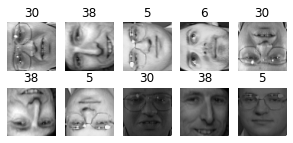

In [26]:
# 일부 이미지 수정(예, 회전/ 뒤집기/ 어둡게 하기)
n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.3
y_darkened = y_train[:n_darkened]

X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad)

In [27]:
X_bad_faces_pca = pca.transform(X_bad_faces)

잘못된 사진은 이 가우시안 혼합 모델에서 등장할 가능성이 매우 낮다.

In [28]:
gm.score_samples(X_bad_faces_pca)

array([-1.79997507e+07, -2.26427360e+07, -3.96415577e+07, -4.60254432e+07,
       -3.13975186e+07, -1.39330473e+07, -2.90882776e+07, -1.06298575e+08,
       -1.20931015e+08, -7.49739798e+07])

In [29]:
gm.score_samples(X_train_pca[:10])

array([1163.0202093 , 1149.16682369, 1148.47710431, 1170.6760289 ,
       1088.46009564, 1075.71700315, 1075.7170075 , 1088.4600894 ,
       1096.42609709, 1119.68627026])

# 13.
일부 차원 축소 기법은 이상치 탐지를 위해서 사용할 수 있습니다. 예를 들어 올리베티 얼굴 데이터셋을 PCA를 사용해 분산의 99% 유지하도록 축소해보세요. 그 다음 각 이미지의 재구성 오차를 계산합니다. 그 다음 이전 연습문제에서 만든 수정된 이미지를 선택해 재구성 오차를 확인해보세요. 재구성 오차가 얼마나 커지는지 확인하세요. 재구성 이미지를 출력해보면 이유를 알 수 있습니다. 정상 얼굴을 재구성하기 때문입니다.

In [30]:
# PCA를 사용해 축소된 데이터셋
X_train_pca

array([[ 3.78081870e+00, -1.85478783e+00, -5.14404106e+00, ...,
        -1.35633215e-01, -2.14082390e-01,  6.11918792e-02],
       [ 1.01488552e+01, -1.52754641e+00, -7.66972005e-01, ...,
         1.23938702e-01, -1.35264218e-01, -2.32756715e-02],
       [-1.00152893e+01,  2.87729931e+00, -9.19886231e-01, ...,
         7.26091713e-02, -2.96061928e-03,  1.24891475e-01],
       ...,
       [ 2.47586775e+00,  2.95597267e+00,  1.29985702e+00, ...,
        -2.09132396e-02,  3.48520577e-02, -1.54326335e-01],
       [-3.22031188e+00,  5.34898090e+00,  1.39427006e+00, ...,
         5.75526841e-02, -2.28311747e-01,  1.55578002e-01],
       [-9.22877133e-01, -3.64703012e+00,  2.26088071e+00, ...,
         1.36853680e-01, -6.91293478e-02,  6.26830086e-02]], dtype=float32)

In [31]:
# 재구성 오차 함수
def reconstruction_errors(pca, X):
    X_pca = pca.transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    mse = np.square(X_reconstructed - X).mean(axis=-1) # 평균 제곱 오차
    return mse

In [32]:
reconstruction_errors(pca, X_train).mean()

0.0001920535

In [33]:
# 재구성한 이미지 오차
reconstruction_errors(pca, X_bad_faces).mean()

0.004707354

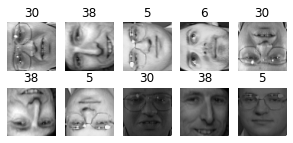

In [34]:
# 수정한 이미지
plot_faces(X_bad_faces, y_bad)

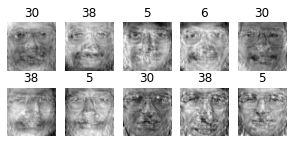

In [35]:
# 재구성 이미지 출력
X_bad_faces_reconstructed = pca.inverse_transform(X_bad_faces_pca)
plot_faces(X_bad_faces_reconstructed, y_bad)

정상 얼굴을 재구성하기 때문에 재구성 오차가 커진다.